<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/AI106_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = np.array([105,118,120,126,133,135, 135]) # Eğitim verimiz bu hücre
y = np.array([208,220,215,228,228,223,235])

In [ ]:
x2 = np.array([113,123,140,142,144]) # Test verilerimiz bu hücre
y2 = np.array([212,218,228,224,228])

In [ ]:
xt = np.array([105,118,120,126,133,135, 135, 113,123,140,142,144]) # Veriler toplamı olan hücre
yt = np.array([208,220,215,228,228,223,235, 212,218,228, 224,228])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = x.reshape(-1,1) # 2 boyutluya çevirdik.
y = y.reshape(-1,1)

X_test = x2.reshape(-1,1)
y2 = y2.reshape(-1,1)

xt = xt.reshape(-1,1)
yt = yt.reshape(-1,1)

In [ ]:
reg = LinearRegression()
model = reg.fit(X, y)

In [ ]:
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)

intercept:  [133.89697909]
coef:  [[0.71068939]]


In [ ]:
predict = model.predict(X)

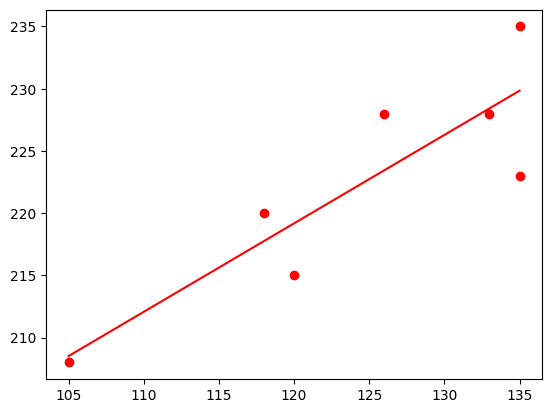

In [ ]:
plt.plot(X,y, "ro")
plt.plot(X,predict, "r")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
train_predictions = model.predict(X)
MAE = mean_absolute_error(y, train_predictions)
MAE

3.4165099037291133

In [ ]:
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y2, test_predictions)
MAE

5.992254066615021

In [ ]:
total_predictions = model.predict(xt)
MAE = mean_absolute_error(yt, total_predictions)
MAE

4.489736638264908

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rmodel = Ridge(alpha = 1000).fit(X, y)

In [ ]:
print("r-intercept: ", rmodel.intercept_)
print("r-coef: ", rmodel.coef_)

r-intercept:  [184.84413022]
r-coef:  [0.30170996]


In [ ]:
rpredict = rmodel.predict(X)

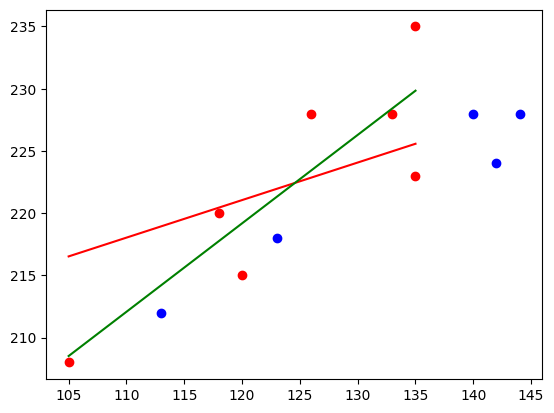

In [ ]:
plt.plot(X, y, "ro")
plt.plot(X, rpredict, "r")
plt.plot(X, predict, "g")
plt.plot(x2, y2, "bo")

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv_model = RidgeCV(alphas = (10, 20, 50, 500, 1000), scoring = 'neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X, y)

RidgeCV(alphas=(10, 20, 50, 500, 1000), scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.alpha_

np.int64(10)

In [ ]:
ridge_cv_model.best_score_

-4.645490856014135

In [ ]:
df = pd.read_csv("Advertising.csv")
X = df.drop('sales', axis = 1)
y = df['sales']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [ ]:
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ridge_model = Ridge(alpha = 10)

In [ ]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [ ]:
test_predictions = ridge_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)

In [ ]:
MAE

0.5774404204714163

In [ ]:
MSE

0.8003783071528352

In [ ]:
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train, train_predictions)
MAE

0.5288348183025309

In [ ]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.alpha_

np.float64(0.1)

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)

In [ ]:
MAE

0.427377488434534

In [ ]:
MSE

0.3820129881525864

In [ ]:
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.30941321056539456

# Cross Validation

In [ ]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
X = df.drop('sales',axis=1)
y = df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
model=LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model,X_train,y_train, scoring='neg_mean_squared_error',cv=5)

In [ ]:
scores

array([-3.13932842, -1.6224631 , -5.37383747, -2.24224626, -4.34167085])

In [ ]:
abs(scores.mean())

np.float64(3.343909221204688)

In [ ]:
model = Ridge(alpha=1)

In [ ]:
scores = cross_val_score(model,X_train,y_train, scoring='neg_mean_squared_error',cv=5)

In [ ]:
scores

array([-3.13950859, -1.62235574, -5.37385624, -2.24222086, -4.34151629])

In [ ]:
abs(scores.mean())

np.float64(3.3438915436537484)

In [ ]:
df.sales.mean()

np.float64(14.0225)

In [ ]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Sınıflandırma

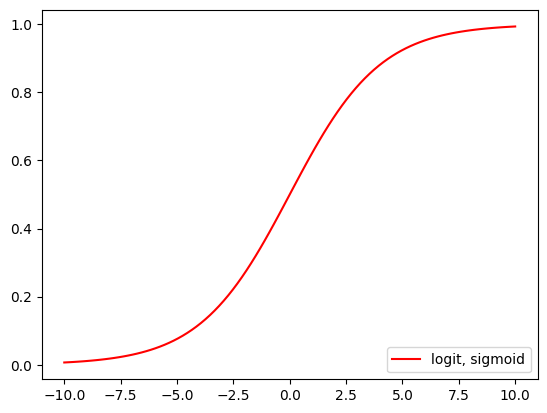

In [ ]:
x = np.linspace(-10, 10, 100)
c = 0.5*x
b = 1.0 / (1.0 + np.exp(-c))

plt.plot(x, b, 'r', label = 'logit, sigmoid')
plt.legend(loc = 'lower right')

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
c = 2.5
prob = sigmoid(c)

In [ ]:
prob

np.float64(0.9241418199787566)

In [ ]:
def logit(p):
  return np.log(p / (1 - p))


  # Yukaarıdaki olasılığı geri çeviriyoruz.
z_recovered = logit(prob)

print(f"Olasılık: {prob:.4f}")
print(f"Geri dönen lineer değer (logit(p)): {z_recovered:.4f}")

Olasılık: 0.9241
Geri dönen lineer değer (logit(p)): 2.5000


In [ ]:
df = pd.read_csv("satis_tahmin.csv")
df

,Yaş,Maaş,Sipariş
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.isnull().sum()

,0
Yaş,0
Maaş,0
Sipariş,0


In [ ]:
df.describe().T # Transpose ettik.

,count,mean,std,min,25%,50%,75%,max
Yaş,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
Maaş,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Sipariş,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
df['Sipariş'].value_counts()

,count
Sipariş,
0,257
1,143


<Axes: xlabel='Sipariş', ylabel='count'>

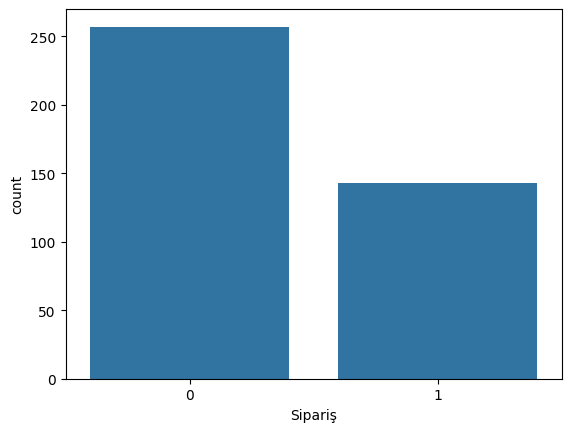

In [ ]:
sns.countplot(data=df,x='Sipariş')

<Axes: xlabel='Sipariş', ylabel='Maaş'>

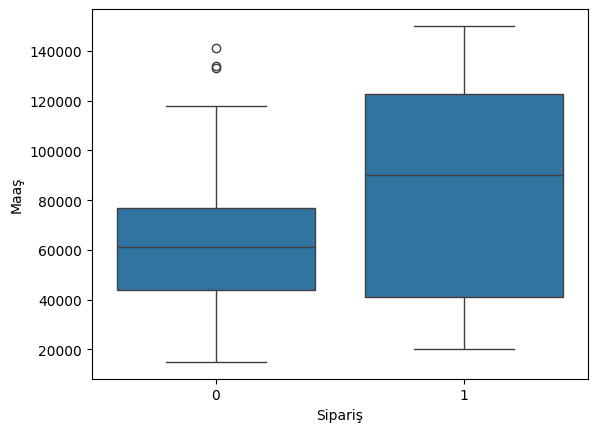

In [ ]:
sns.boxplot(x='Sipariş',y='Maaş',data=df)

<Axes: xlabel='Sipariş', ylabel='Yaş'>

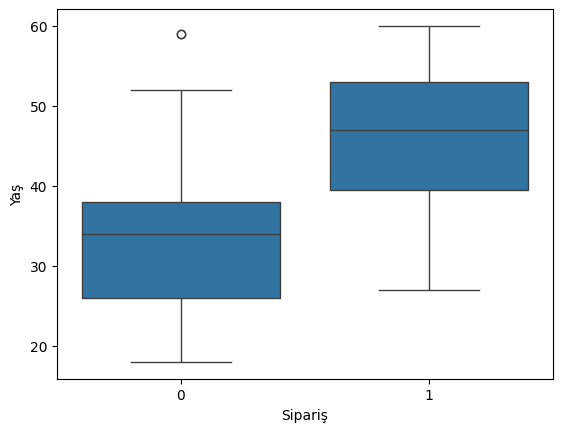

In [ ]:
sns.boxplot(x='Sipariş',y='Yaş',data=df)

<Axes: xlabel='Yaş', ylabel='Maaş'>

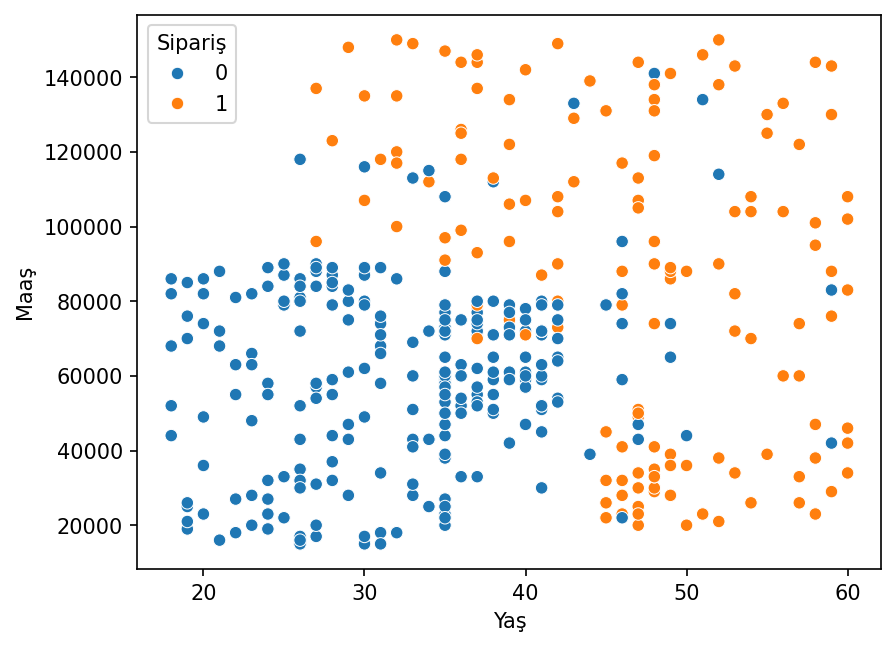

In [ ]:
plt.figure(dpi=150)

sns.scatterplot(x='Yaş',y='Maaş',data=df,hue='Sipariş')

<Axes: xlabel='Maaş', ylabel='Yaş'>

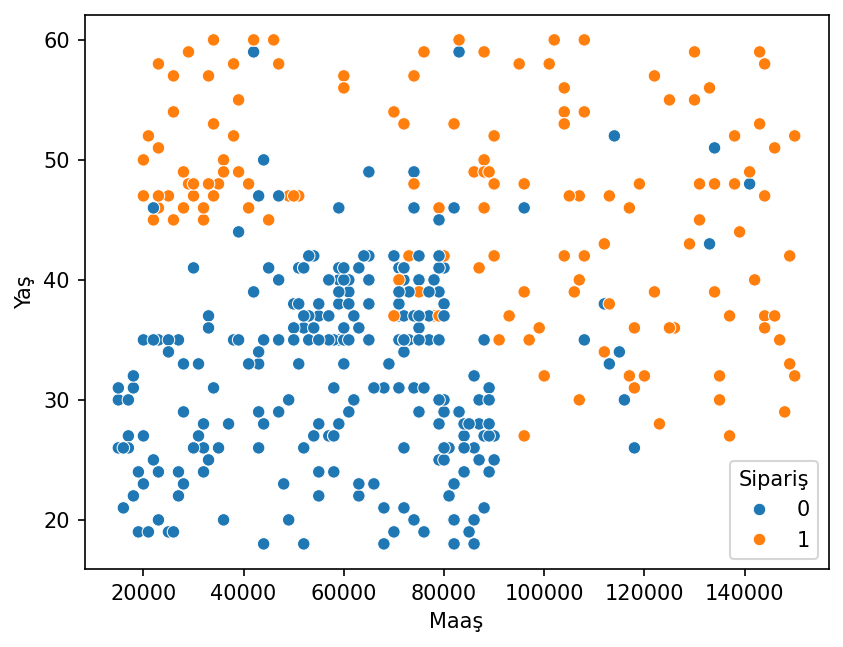

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x='Maaş',y='Yaş',data=df,hue='Sipariş')

<Figure size 1152x864 with 0 Axes>

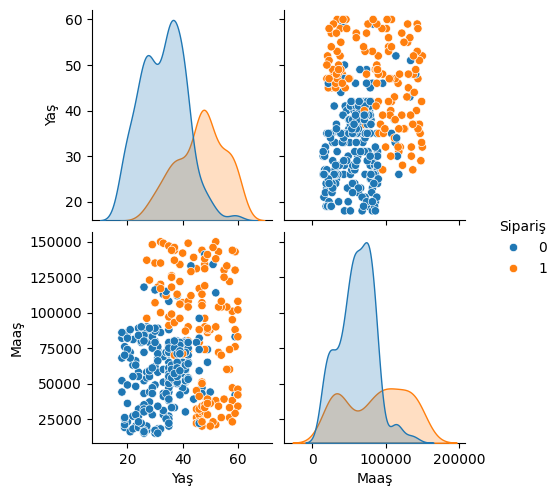

In [ ]:
plt.figure(dpi=180)
sns.pairplot(df,hue='Sipariş')

<Axes: >

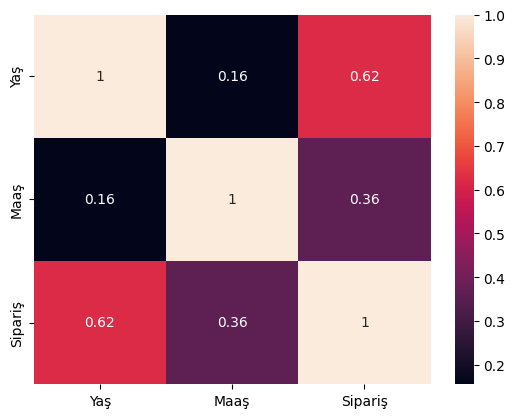

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Yaş', ylabel='Sipariş'>

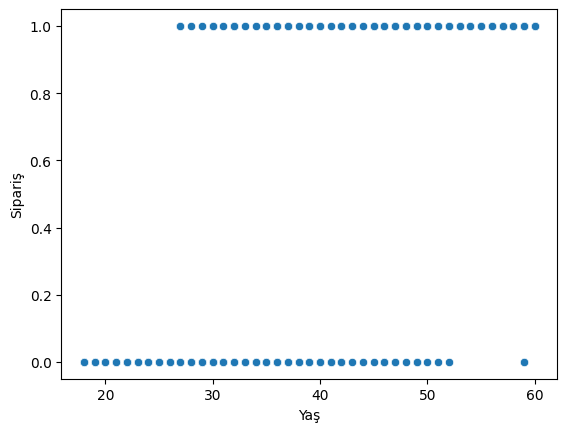

In [ ]:
sns.scatterplot(x='Yaş',y='Sipariş',data=df)

<Axes: xlabel='Maaş', ylabel='Sipariş'>

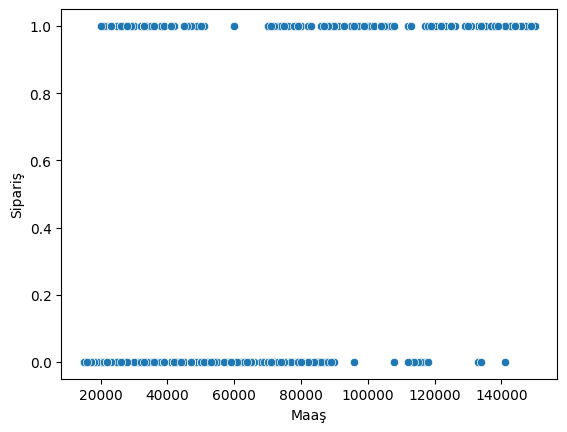

In [ ]:
sns.scatterplot(x='Maaş',y='Sipariş',data=df)

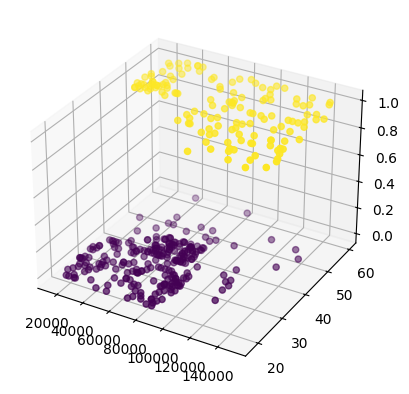

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Maaş'],df['Yaş'],df['Sipariş'],c=df['Sipariş'])

In [ ]:
X = df.drop('Sipariş',axis=1)
y = df['Sipariş']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[2.29848885, 1.16204722]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
print(y_test)

38     0
387    0
270    0
181    0
195    0
201    0
133    0
118    0
189    0
165    0
222    1
340    1
171    0
143    0
374    0
183    0
302    1
156    0
368    0
19     1
290    1
324    1
380    0
293    0
348    0
104    0
139    0
366    1
205    0
210    1
100    0
114    0
8      0
72     0
240    1
160    1
247    1
274    1
391    1
155    0
Name: Sipariş, dtype: int64


In [ ]:
accuracy_score(y_test,y_pred) # Ana metrik doğruluk.

0.8

In [ ]:
tahminler =       [1,1,0,1,1,0,0,1,1,0]
gercek_degerler = [1,0,0,1,1,1,0,1,0,0]

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(gercek_degerler,tahminler))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [ ]:
tahminler =       [1,1,1,1,1,1,1,1,1,1]
gercek_degerler = [1,1,1,1,1,1,1,1,1,0]

In [ ]:
confusion_matrix(gercek_degerler, tahminler)

array([[0, 1],
       [0, 9]])

In [ ]:
print(metrics.classification_report(gercek_degerler,tahminler))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
tahminler =       [1,0,0,1,1,1,0,1,0,0]
gercek_degerler = [1,0,0,1,1,1,0,1,0,0]

In [ ]:
print(metrics.classification_report(gercek_degerler,tahminler))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
confusion_matrix(gercek_degerler, tahminler)

array([[5, 0],
       [0, 5]])

In [ ]:
esik

array([inf,  1.,  0.])

In [ ]:
fpr

array([0., 0., 1.])

In [ ]:
tpr

array([0., 1., 1.])

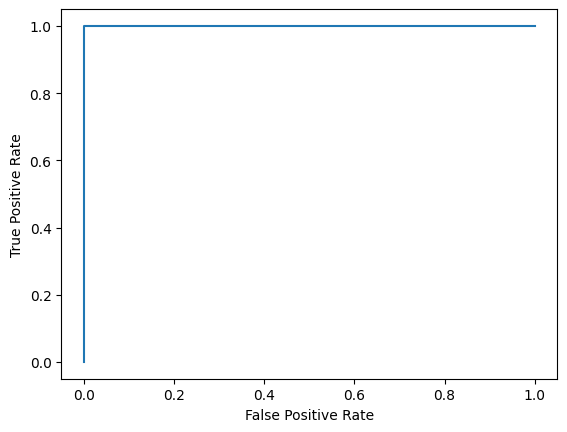

In [ ]:
# En son yaptığımız tahminler için.
fpr, tpr, esik = metrics.roc_curve(gercek_degerler, tahminler) # False positive rate'in True positive rate'e göre grafiğini verir.
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

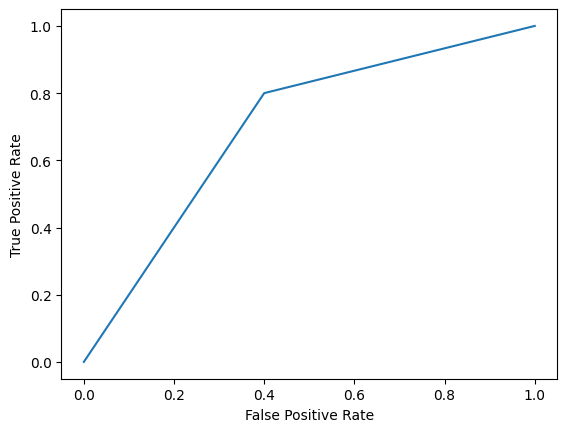

In [ ]:
# İlk durumdaki tahminler için
fpr, tpr, esik = metrics.roc_curve(gercek_degerler, tahminler) # False positive rate'in True positive rate'e göre grafiğini verir.
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

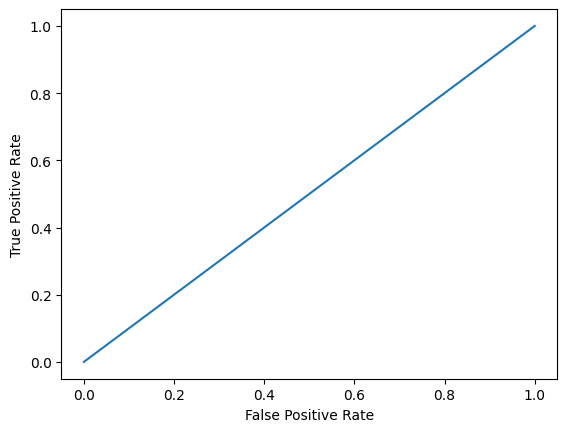

In [ ]:
# İkinci durum için
fpr, tpr, esik = metrics.roc_curve(gercek_degerler, tahminler) # False positive rate'in True positive rate'e göre grafiğini verir.
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()